In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2)

In [ ]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [ ]:
data.isnull().any()
#sns.distplot(dataset['Profit'],bins=5,kde=True)

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


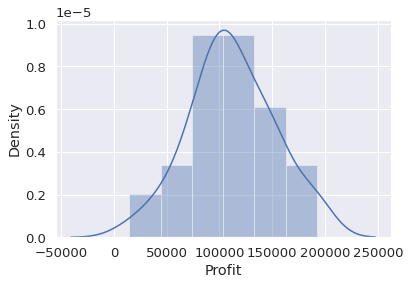

In [ ]:
sns.distplot(data['Profit'],bins=6,kde=True)

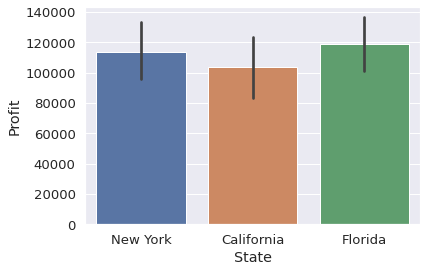

In [ ]:
sns.barplot(x='State',y='Profit',data=data)

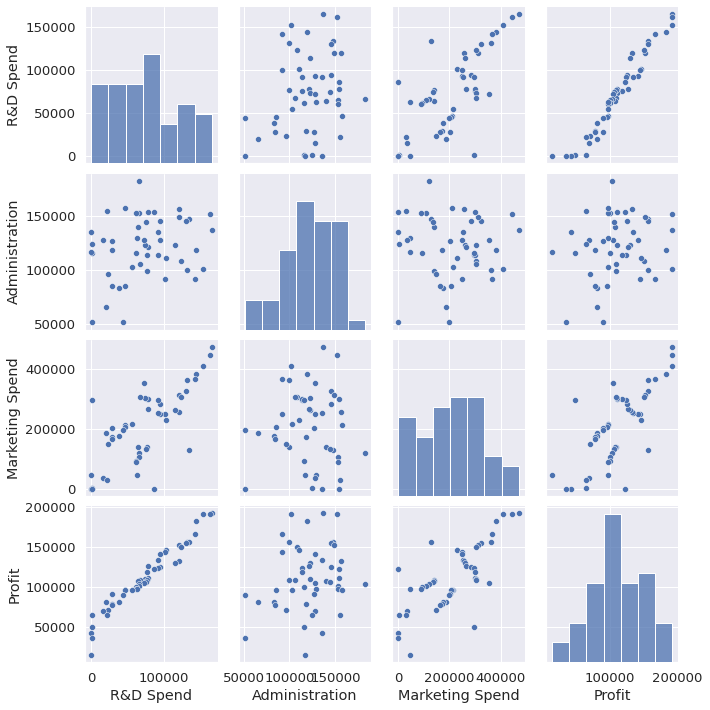

In [ ]:
sns.pairplot(data)

**One Hot Encoder**

In [ ]:
numerical_pipeline = Pipeline( [ ('Std_Scaler',StandardScaler())])

#from sklearn.preprocessing import MinMaxScaler

In [ ]:
numerical_attrs = ['R&D Spend','Administration','Marketing Spend']
categorical_attrs = ['State']

In [ ]:
fullpipeline = ColumnTransformer([('num',numerical_pipeline,numerical_attrs),
                                   ('cat',OneHotEncoder(),categorical_attrs)])

In [ ]:
x=data.drop('Profit',axis = 1)
y=data['Profit']

In [ ]:
x=fullpipeline.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
model.score(X_train , y_train)

0.9501847627493607

In [ ]:
model.score(X_test , y_test)

0.9347068473282425

In [ ]:
from sklearn.metrics import mean_squared_error
model.mse = mean_squared_error (y_test , y_pred)
model.rmse = np.sqrt(model.mse)
model.rmse

9137.990152794946